## 1. Exploratory Data Analysis the Tariff data

In [1]:
# Load neccessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from plotnine import *
%matplotlib inline

In [2]:
# Custom date function
dateparse = lambda x: pd.datetime.strptime(x, '%b-%y')

# Load the import value data from China, Asean and Vietnam to US between 01/2016 and 12/2019
# The data was downloaded from https://usatrade.census.gov/
df1 = pd.read_csv('d:/git/InSightProject/data/raw/Total import by CAVM.csv', skiprows=5,
                  parse_dates=["Time"], date_parser=dateparse, thousands=',')
df1.head()

C:\Users\nvduy\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


,Time,China,Mexico,Vietnam,ASEAN
0,2016-01-01,37126434120,22337723342,3167752425,11636951006
1,2016-02-01,36066892525,23121746528,3448125637,12070812282
2,2016-03-01,29812326908,24692111632,3308419901,13384850175
3,2016-04-01,32920204539,24985773651,2995067822,12304945644
4,2016-05-01,37513726589,24761062479,3249979702,13359723861


In [3]:
# Reshape trade data for visualization
df1 = df1.melt(id_vars=['Time'], var_name='Country', value_name='Import_Value')
df1.head()

,Time,Country,Import_Value
0,2016-01-01,China,37126434120
1,2016-02-01,China,36066892525
2,2016-03-01,China,29812326908
3,2016-04-01,China,32920204539
4,2016-05-01,China,37513726589


In [4]:
# Convert trade values to log transformation to dectect changes between months better
df1['IHS_Import_Value'] = np.log2(df1['Import_Value'])

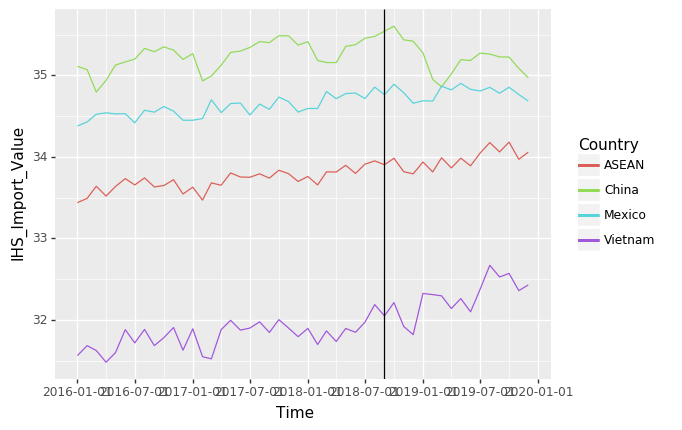

<ggplot: (-9223371903887934788)>

In [5]:
# Draw the time trend among countries
(ggplot(df1) + geom_line(aes(x='Time', y='IHS_Import_Value', color='Country')) + geom_vline(xintercept=pd.to_datetime('2018-09-01')))

We see that there is a clear dip for China and a slight jump for Vietnam log import values into the US after the implementation of tariff around September 2018. This is the average trend, how it is differently for each type of business?

## 2. China case in depth

### 2.1. Process Harmonized Coded import products (HTS)

In [6]:
# Loading the raw import dataset from  https://usatrade.census.gov at HTS 10 digits level.
import_cn = pd.read_csv('d:/git/InSightProject/data/raw/China - Monthly since 2016 - HS10.csv', thousands=',')
import_cn.tail()

,Commodity,Jan-16,Feb-16,Mar-16,Apr-16,May-16,Jun-16,Jul-16,Aug-16,Sep-16,...,Mar-19,Apr-19,May-19,Jun-19,Jul-19,Aug-19,Sep-19,Oct-19,Nov-19,Dec-19
30384,9818000700 Equip/pts Repaired In Foreign Cty O...,9188.0,27869.0,12298451.0,2545054.0,6973200.0,35917.0,24885.0,3433928.0,1484666.0,...,NaN,1722423.0,22960.0,32372.0,74739.0,3823414.0,27836.0,15974.0,3816488.0,NaN
30385,9999001000 Equipment And Repairs Of Civil Airc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30386,"9999001500 Equipment And Repairs Of Vessels, N...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30387,9999002000 Dutiable Mdse Fr Vessel Sunk 2 Yr I...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30388,9999950000 Estimated Imports Of Low Valued Tra...,253917504.0,250859404.0,239033484.0,237356439.0,252942614.0,255685479.0,253658918.0,282189072.0,262277782.0,...,288031856.0,313277284.0,334508045.0,310099534.0,343035230.0,341272639.0,336559216.0,344663090.0,330134811.0,326276074.0


In [8]:
# Create HTS10 and HTS8 digit level product groups from the Commodity description and delete the original column
import_cn['hts10'] = import_cn.Commodity.str.slice(0,10)

import_cn['hts8'] = import_cn.Commodity.str.slice(0,8)

In [9]:
# Drop unneccessary columns
import_cn.drop(['Commodity','Sep-19', 'Oct-19', 'Nov-19', 'Dec-19'], inplace=True, axis=1)

In [15]:
# Create a boolean mask for numeric columns
numeric_mask = (import_cn.dtypes == 'float64')

# Get list of numeric column names
numeric_columns = import_cn.columns[numeric_mask].tolist()

# Apply log transformation to numeric columns
import_cn[numeric_columns] = import_cn[numeric_columns].apply(lambda x: np.log2(x))

# Print the tail of the log transformed columns
print(import_cn[numeric_columns].tail())

          Jan-16     Feb-16     Mar-16     Apr-16     May-16     Jun-16  \
30384  13.165535  14.766374  23.551973  21.279265  22.733389  15.132379   
30385        NaN        NaN        NaN        NaN        NaN        NaN   
30386        NaN        NaN        NaN        NaN        NaN        NaN   
30387        NaN        NaN        NaN        NaN        NaN        NaN   
30388  27.919785  27.902304  27.832637  27.822480  27.914235  27.929795   

          Jul-16     Aug-16     Sep-16     Oct-16  ...     Nov-18     Dec-18  \
30384  14.602989  21.711428  20.501707  16.752054  ...        NaN  14.774530   
30385        NaN        NaN        NaN        NaN  ...        NaN        NaN   
30386        NaN        NaN        NaN        NaN  ...        NaN        NaN   
30387        NaN        NaN        NaN        NaN  ...        NaN        NaN   
30388  27.918315  28.072087  27.966520  27.956334  ...  28.301536  28.223971   

          Jan-19     Feb-19     Mar-19     Apr-19     May-19     Jun

In [17]:
# Fill NAs values with 0
import_cn.fillna(0)

,Jan-16,Feb-16,Mar-16,Apr-16,May-16,Jun-16,Jul-16,Aug-16,Sep-16,Oct-16,...,Jan-19,Feb-19,Mar-19,Apr-19,May-19,Jun-19,Jul-19,Aug-19,hts10,hts8
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0101100010,01011000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0101100020,01011000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0101110010,01011100
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0101110020,01011100
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0101190010,01011900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30384,13.165535,14.766374,23.551973,21.279265,22.733389,15.132379,14.602989,21.711428,20.501707,16.752054,...,14.999383,22.025805,0.000000,20.716008,14.486835,14.982459,16.189574,21.86643,9818000700,98180007
30385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,9999001000,99990010
30386,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,9999001500,99990015
30387,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,9999002000,99990020


### 2.2. Process China tariff data